In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# I'm trying to familiarize myself with the matplotlib.pylot library, 
# so it is the only plotting library I will be using in this project.

# Import and Prep Data

In [2]:
feature_data = pd.read_csv('data/train_features.csv')
salary_data = pd.read_csv('data/train_salaries.csv')

In [3]:
feature_data.head() #take a look at the features
# There are 8 variables, 6 categorical, 2 numerical
# jobId will probably not be used in the model, 
# since it looks like it uniquely identifies each row of data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
salary_data.head() # take a look at the target data
# numerical target indicates we should attempt to fit some type of regression model

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
# join the features data with the target variable(salary), 
# the join will be done on the jobId column
all_data = feature_data.merge(salary_data, how = 'inner', on='jobId',validate='1:1')
# we're doing an inner join, because we can only use data where both the target and feature variables are available

In [6]:
all_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [8]:
#split into two groups
import random
TEST_PERCENT = 0.2

#create a list of integers that is a certain percent of the
#length of the dataset, which will be the rows that end up in 
#the test dataset
test_index = random.sample(range(len(all_data)),int(len(all_data)*TEST_PERCENT))
train_index = np.setdiff1d(np.arange(0,len(all_data)), test_index)
all_data_test = all_data.iloc[test_index]
all_data_train = all_data.iloc[train_index]

In [9]:
len(all_data_train)

800000

In [10]:
len(all_data_test)

200000

In [11]:
# assuming that all data is unique in the original dataset
# however, just because there are 1million unique jobIds does not mean this is the case

# Exploratory Data Analysis

In [12]:
#look at each column

#companyId
all_data_train['companyId'].nunique()

63

In [13]:
all_data_train['companyId'].value_counts().sort_values() #visual might be better here

COMP8     12478
COMP57    12509
COMP2     12516
COMP16    12537
COMP52    12557
          ...  
COMP40    12845
COMP19    12858
COMP30    12880
COMP35    12897
COMP39    12924
Name: companyId, Length: 63, dtype: int64

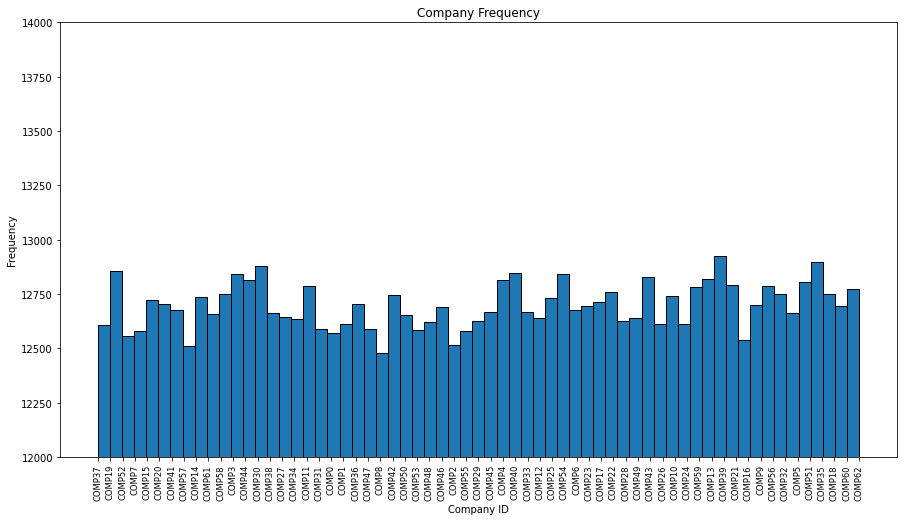

In [14]:
plt.figure(figsize = (15,8))
plt.hist(all_data_train['companyId'], bins = 63, edgecolor = 'black')
plt.title('Company Frequency')
plt.xlabel('Company ID')
plt.ylabel('Frequency')
plt.ylim(12000,14000)
plt.xticks(rotation=90,fontweight='medium',fontsize='small')
plt.show() # hist displays without this, but this gets rid of all of the extra data

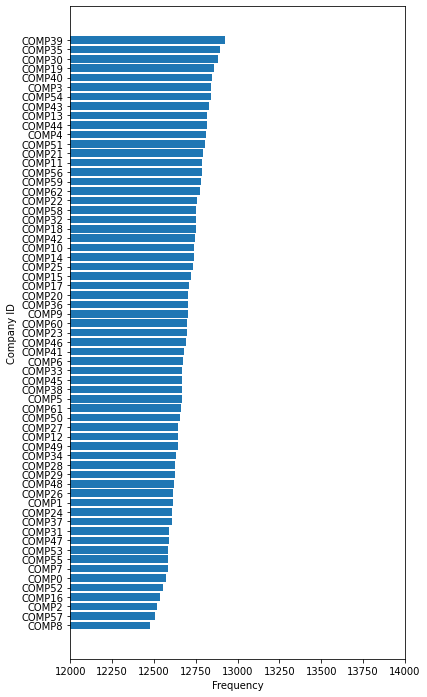

In [15]:
# another way to look at it
fig, ax = plt.subplots(figsize = (6,12))
ax.barh(all_data_train['companyId'].value_counts().sort_values().index,all_data_train['companyId'].value_counts().sort_values())
ax.set_xlim(12000,14000)
ax.set_ylabel('Company ID')
ax.set_xlabel('Frequency')
plt.show()

In [16]:
# looks like each company appears between 12750 and 13250 times out of 818K data points, a range of 500

In [17]:
#jobType
all_data_train['jobType'].nunique()

8

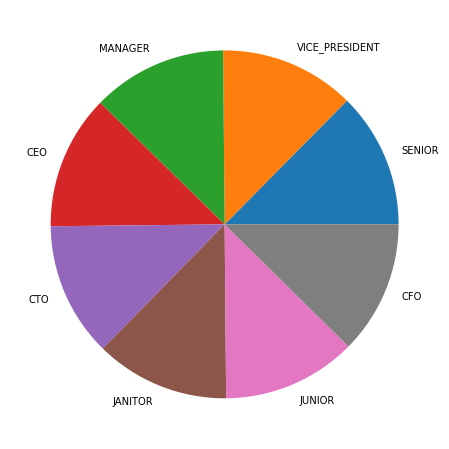

In [18]:
fig, ax = plt.subplots(figsize = (8,8))
plt.pie(all_data_train['jobType'].value_counts(), labels = all_data_train['jobType'].value_counts().index)
plt.show()

In [19]:
# looks a bit suspicious, let's check that it's accurate
all_data_train['jobType'].value_counts()/len(all_data_train)

SENIOR            0.125870
VICE_PRESIDENT    0.125532
MANAGER           0.125441
CEO               0.124919
CTO               0.124855
JANITOR           0.124756
JUNIOR            0.124744
CFO               0.123883
Name: jobType, dtype: float64

In [20]:
#about 12.5% of each jobType, what an odd dataset

In [21]:
# is there a correlation between jobType and salary
all_data_train.groupby(['jobType']).mean()['salary']

jobType
CEO               145.309871
CFO               135.461637
CTO               135.489978
JANITOR            70.785672
JUNIOR             95.353044
MANAGER           115.376322
SENIOR            105.529584
VICE_PRESIDENT    125.432498
Name: salary, dtype: float64

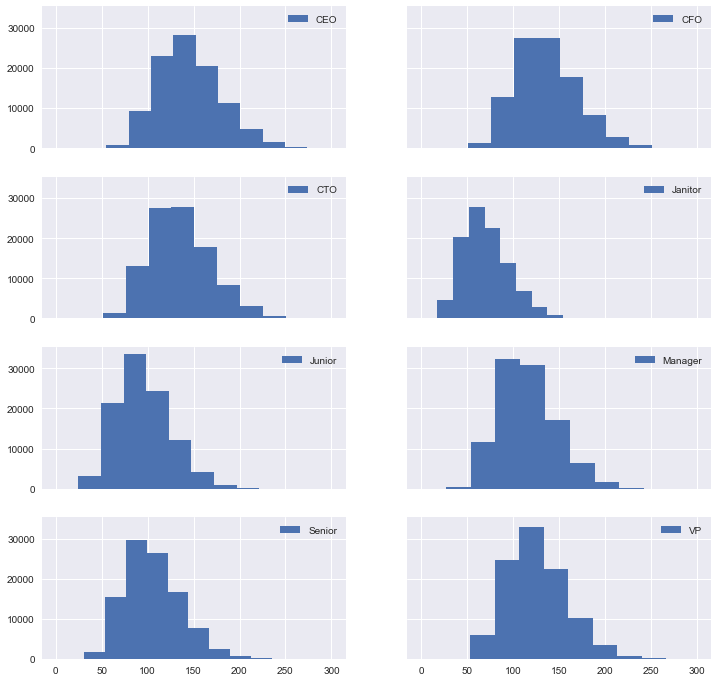

In [22]:
# plot salary by jobType
# use subplots here
plt.style.use('seaborn')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,2,figsize=(12,12),sharex=True,sharey=True)

ax1[0].hist(all_data_train[all_data_train['jobType'] == 'CEO']['salary'], label = 'CEO')
ax1[1].hist(all_data_train[all_data_train['jobType'] == 'CFO']['salary'], label = 'CFO')
ax2[0].hist(all_data_train[all_data_train['jobType'] == 'CTO']['salary'], label = 'CTO')
ax2[1].hist(all_data_train[all_data_train['jobType'] == 'JANITOR']['salary'], label = 'Janitor')
ax3[0].hist(all_data_train[all_data_train['jobType'] == 'JUNIOR']['salary'], label = 'Junior')
ax3[1].hist(all_data_train[all_data_train['jobType'] == 'MANAGER']['salary'], label = 'Manager')
ax4[0].hist(all_data_train[all_data_train['jobType'] == 'SENIOR']['salary'], label = 'Senior')
ax4[1].hist(all_data_train[all_data_train['jobType'] == 'VICE_PRESIDENT']['salary'], label = 'VP')
ax1[0].legend()
ax1[1].legend()
ax2[0].legend()
ax2[1].legend()
ax3[0].legend()
ax3[1].legend()
ax4[0].legend()
ax4[1].legend()
plt.show()

#next time, put this into a for loop

In [23]:
# C-level, Manager, and VP have a wider range with the highest maximums, and janitor's salary range is on the lower end.
# The bulk of the C-level job salaries are greater than the Senior and Manager, but the ranges aren't that different, which is surprising

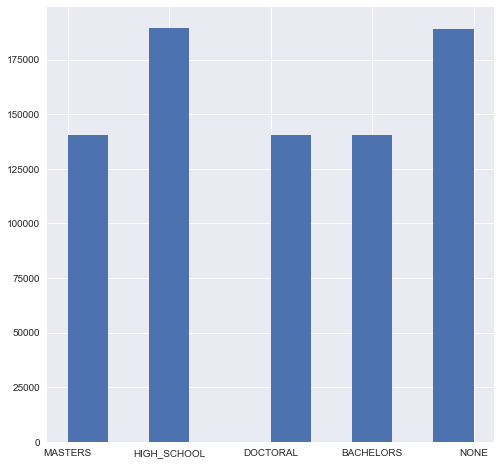

In [24]:
#degree
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(all_data_train['degree'])
plt.show()

In [25]:
# break the data up by degree and jobType

#labels = all_data_train['jobType'].sort_values().unique()
#fig, ax = plt.subplots()
# for every job type, count the number of each type of degree
#ax.bar(all_data_train['degree'].value_counts())

#skipping this for now, need to understand the various plot implementations better

In [26]:
# roughly, the data is evenly split between high school and lower, and bachelor's or higher

In [27]:
#major
all_data_train['major'].value_counts()

NONE           425419
LITERATURE      47197
ENGINEERING     47077
CHEMISTRY       47073
PHYSICS         46848
BUSINESS        46828
COMPSCI         46785
BIOLOGY         46729
MATH            46044
Name: major, dtype: int64

In [28]:
#any empty strings?
all_data_train['major'] == ''

0         False
1         False
2         False
4         False
5         False
          ...  
999994    False
999995    False
999996    False
999997    False
999999    False
Name: major, Length: 800000, dtype: bool

In [29]:
#about half of the data points have no major, and the other half are about equally split at around 47k

In [30]:
#majors by degree type
all_data_train[['major','degree']].value_counts()

major        degree     
NONE         HIGH_SCHOOL    189649
             NONE           189099
LITERATURE   DOCTORAL        15826
PHYSICS      MASTERS         15800
ENGINEERING  BACHELORS       15785
NONE         DOCTORAL        15745
LITERATURE   MASTERS         15722
CHEMISTRY    MASTERS         15722
BUSINESS     DOCTORAL        15718
BIOLOGY      BACHELORS       15712
CHEMISTRY    BACHELORS       15701
COMPSCI      MASTERS         15681
ENGINEERING  DOCTORAL        15667
COMPSCI      BACHELORS       15650
CHEMISTRY    DOCTORAL        15650
LITERATURE   BACHELORS       15649
ENGINEERING  MASTERS         15625
BUSINESS     MASTERS         15575
BIOLOGY      DOCTORAL        15548
PHYSICS      DOCTORAL        15547
BUSINESS     BACHELORS       15535
PHYSICS      BACHELORS       15501
NONE         BACHELORS       15496
BIOLOGY      MASTERS         15469
COMPSCI      DOCTORAL        15454
NONE         MASTERS         15430
MATH         MASTERS         15358
             BACHELORS       1

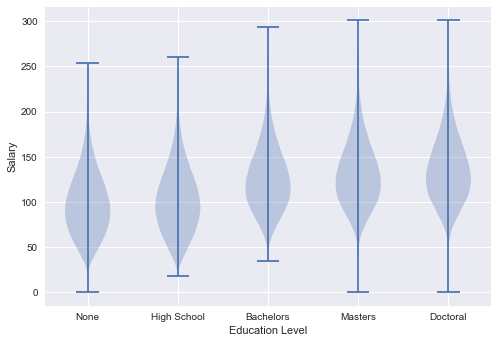

In [31]:
#salary by degree comparison
degree_none = all_data_train[all_data_train['degree'] == 'NONE']['salary']
degree_hs = all_data_train[all_data_train['degree'] == 'HIGH_SCHOOL']['salary']
degree_bach = all_data_train[all_data_train['degree'] == 'BACHELORS']['salary']
degree_master = all_data_train[all_data_train['degree'] == 'MASTERS']['salary']
degree_phd = all_data_train[all_data_train['degree'] == 'DOCTORAL']['salary']

fig, ax = plt.subplots()
ax.violinplot([degree_none,degree_hs,degree_bach,degree_master,degree_phd])
ax.set_xlabel('Education Level')
ax.set_ylabel('Salary')
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['None','High School','Bachelors','Masters','Doctoral'])
plt.show()

In [32]:
# widest range in salary occurs with the Master's degree
# the biggest shift in salary comes from the Bachelor's degree
# distributions of none and hs seem to about the same
# distributions of Masters and Doctoral seem to be about the same

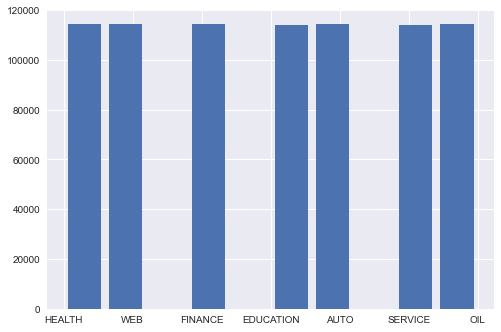

In [33]:
#industry
fig, ax = plt.subplots()
ax.hist(all_data_train['industry'], rwidth = 0.8)
plt.show()

In [34]:
#evenly distributed across industries

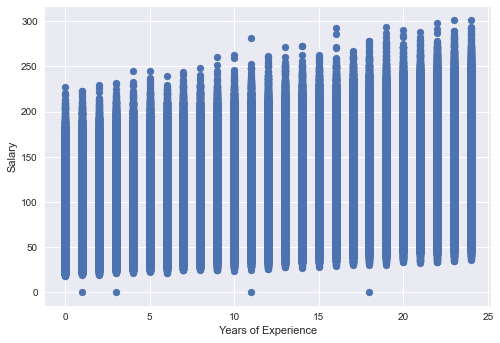

In [35]:
#yearsExperience
fig, ax = plt.subplots()
ax.scatter(all_data_train['yearsExperience'],all_data_train['salary'])
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
plt.show()

In [36]:
# there seems to be some 0 salaries
all_data_train[all_data_train['salary']==0]
#should these 4 data points be removed?
#does pandas change empty or null values to 0 when reading file?

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


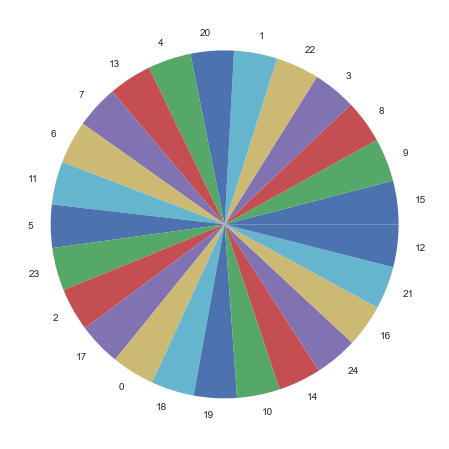

In [37]:
#yearsExperience
fig, ax = plt.subplots(figsize = (8,8))
plt.pie(all_data_train['yearsExperience'].value_counts(), labels = all_data_train['yearsExperience'].value_counts().index)
plt.show()

In [38]:
all_data_train[['yearsExperience','salary']].corr()
#linear correlation between years of experience and salary is pretty low

,yearsExperience,salary
yearsExperience,1.000000,0.374836
salary,0.374836,1.000000


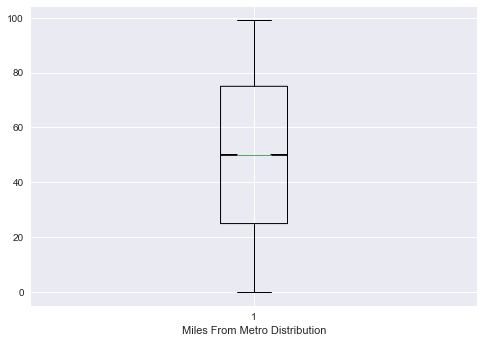

In [39]:
#miles from Metro
fig, ax = plt.subplots()
ax.boxplot(all_data_train['milesFromMetropolis'], notch=True)
ax.set_xlabel('Miles From Metro Distribution')
plt.show()

In [40]:
# seems like 50 is the median miles from metropolis, with 50% of the data being between ~ 25 and 75 miles
# outliers at 0 and 100 miles

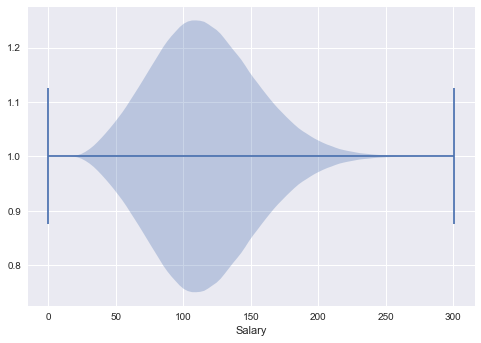

In [41]:
#salary
fig, ax = plt.subplots()
ax.violinplot(all_data_train['salary'],vert = False)
ax.set_xlabel('Salary')
plt.show()

**Data Summary** <br />
companyId - 63 unique, range  for each is 12750-13250 <br />
jobType - 8 unique, each is about 12.5% of total <br />
degree - high school and none are at about 190K, bachelor's, master's, doctoral at about 140K <br />
major - about half have no major listed, the other half are evenly split at around 47K <br />
industry - evenly distributed across all industries, around 119K <br />
yearsExperience - ranges from 0 to 24, data is pretty evenly split among the years <br />
milesfromMetropolis - median is 50, range is 0 to 100, 50% of data is between 25 and 75 miels <br />
salary - normal looking distribution, but right tail is slightly longer than left, mode is between 100 and 125

# One hot encoding categorial variables

In [42]:
# companyId, jobType, degree, major, industry

In [43]:
all_data_train_enc = pd.get_dummies(all_data_train, prefix = ['co','job','deg','mjr','ind'], columns = ['companyId','jobType','degree','major','industry'], drop_first = True)

In [44]:
all_data_train_enc

,jobId,yearsExperience,milesFromMetropolis,salary,co_COMP1,co_COMP10,co_COMP11,co_COMP12,co_COMP13,co_COMP14,...,mjr_LITERATURE,mjr_MATH,mjr_NONE,mjr_PHYSICS,ind_EDUCATION,ind_FINANCE,ind_HEALTH,ind_OIL,ind_SERVICE,ind_WEB
0,JOB1362684407687,10,83,130,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,JOB1362684407688,3,73,101,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,JOB1362684407689,10,38,137,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,JOB1362684407691,8,16,163,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5,JOB1362684407692,2,31,113,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,JOB1362685407681,18,77,115,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
999995,JOB1362685407682,19,94,88,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
999996,JOB1362685407683,12,35,160,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
999997,JOB1362685407684,16,81,64,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


# Fit the Linear Model

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lm = LinearRegression()

In [47]:
y = all_data_train_enc[['salary']]
x = all_data_train_enc.iloc[:,1:] # remove jobId column
x = x.drop(labels = 'salary',axis = 1)

In [48]:
x.head()  

,yearsExperience,milesFromMetropolis,co_COMP1,co_COMP10,co_COMP11,co_COMP12,co_COMP13,co_COMP14,co_COMP15,co_COMP16,...,mjr_LITERATURE,mjr_MATH,mjr_NONE,mjr_PHYSICS,ind_EDUCATION,ind_FINANCE,ind_HEALTH,ind_OIL,ind_SERVICE,ind_WEB
0,10,83,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,3,73,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,10,38,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8,16,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5,2,31,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
lm.fit(x,y)

LinearRegression()

# Update Test Set to Match Training Set

In [50]:
all_data_test.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
776165,JOB1362685183852,COMP41,JANITOR,NONE,NONE,AUTO,9,37,75
53083,JOB1362684460770,COMP61,JUNIOR,BACHELORS,MATH,OIL,4,43,109
26619,JOB1362684434306,COMP12,JUNIOR,MASTERS,BUSINESS,FINANCE,20,94,101
73497,JOB1362684481184,COMP47,VICE_PRESIDENT,NONE,NONE,SERVICE,6,32,80
253369,JOB1362684661056,COMP3,CEO,DOCTORAL,NONE,AUTO,5,26,167


In [51]:
all_data_test_enc = pd.get_dummies(all_data_test, prefix = ['co','job','deg','mjr','ind'], columns = ['companyId','jobType','degree','major','industry'], drop_first = True)

In [52]:
all_data_test_enc.head()

,jobId,yearsExperience,milesFromMetropolis,salary,co_COMP1,co_COMP10,co_COMP11,co_COMP12,co_COMP13,co_COMP14,...,mjr_LITERATURE,mjr_MATH,mjr_NONE,mjr_PHYSICS,ind_EDUCATION,ind_FINANCE,ind_HEALTH,ind_OIL,ind_SERVICE,ind_WEB
776165,JOB1362685183852,9,37,75,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
53083,JOB1362684460770,4,43,109,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
26619,JOB1362684434306,20,94,101,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
73497,JOB1362684481184,6,32,80,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
253369,JOB1362684661056,5,26,167,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
y_test = all_data_test_enc[['salary']]

In [54]:
print(len(y_test))
y_test.head()

200000


,salary
776165,75
53083,109
26619,101
73497,80
253369,167


In [55]:
x_test = all_data_test_enc.iloc[:,1:] # remove jobID column
x_test = x_test.drop(labels = 'salary', axis = 1) #remove salary column
x_test.head()

,yearsExperience,milesFromMetropolis,co_COMP1,co_COMP10,co_COMP11,co_COMP12,co_COMP13,co_COMP14,co_COMP15,co_COMP16,...,mjr_LITERATURE,mjr_MATH,mjr_NONE,mjr_PHYSICS,ind_EDUCATION,ind_FINANCE,ind_HEALTH,ind_OIL,ind_SERVICE,ind_WEB
776165,9,37,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
53083,4,43,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
26619,20,94,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
73497,6,32,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
253369,5,26,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Prediction & Model Assessment

In [56]:
predictions = lm.predict(x_test)

In [57]:
predictions

array([[ 61.49046346],
       [102.61398919],
       [121.71408795],
       ...,
       [112.69422744],
       [ 99.9961103 ],
       [ 85.68446235]])

In [58]:
len(predictions)

200000

In [59]:
#type(predictions) #np ndarray
#type(y_test) #pd df
pd.concat([y_test,pd.DataFrame(predictions)], axis = 1, ignore_index = True, names = ['Salary','Prediction'])

,0,1
0,NaN,61.490463
1,NaN,102.613989
2,NaN,121.714088
3,142.0,94.727692
4,NaN,139.699576
...,...,...
999970,216.0,NaN
999983,122.0,NaN
999985,147.0,NaN
999988,79.0,NaN


In [60]:
residuals = np.array(y_test) - predictions
residuals

array([[ 13.50953654],
       [  6.38601081],
       [-20.71408795],
       ...,
       [ -9.69422744],
       [-22.9961103 ],
       [  8.31553765]])

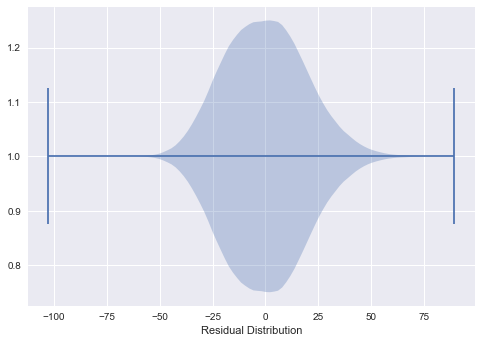

In [61]:
#plot residuals
fig, ax = plt.subplots()
ax.violinplot(residuals, vert = False)
ax.set_xlabel('Residual Distribution')
plt.show()

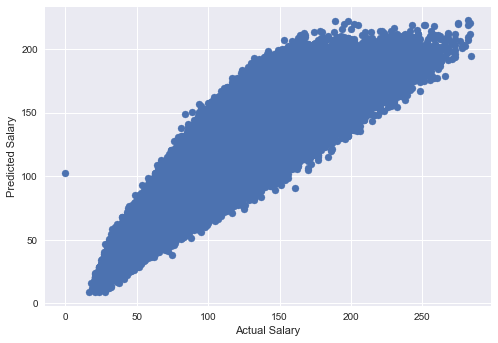

In [62]:
# actual vs predicted
fig, ax = plt.subplots()
ax.scatter(np.array(y_test),predictions)
ax.set_xlabel('Actual Salary')
ax.set_ylabel('Predicted Salary')
plt.show()

In [63]:
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test, predictions))
print('MSE: ',metrics.mean_squared_error(y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE:  15.809859621334569
MSE:  382.5700856592904
RMSE:  3.9761614179173574
